# Predicting-in-app-purchase-using-engagement-metrics

* How does player engagement influence in-game purchases?
* Which behavioral signals indicate monetization opportunities?
* Can early engagement predict purchase likelihood?

### Load Data

In [1]:
import pandas as pd
df=pd.read_json("C:/Users/Udith P Kidiyoor/Downloads/archive (8)/mobile_game_inapp_purchases.json", lines=True)
df.head()

,UserID,Age,Gender,Country,Device,GameGenre,SessionCount,AverageSessionLength,SpendingSegment,InAppPurchaseAmount,FirstPurchaseDaysAfterInstall,PaymentMethod,LastPurchaseDate
0,c9889ab0-9cfc-4a75-acd9-5eab1df0015c,49.0,Male,Norway,Android,Battle Royale,9,12.83,Minnow,11.40,28.0,Apple Pay,1.742342e+12
1,7c9e413c-ecca-45f2-a780-2826a07952a2,15.0,Male,Switzerland,iOS,Action RPG,11,19.39,Minnow,6.37,18.0,Debit Card,1.749341e+12
2,fd61e419-1a92-4f43-a8c7-135842ad328a,23.0,Male,China,Android,Fighting,9,8.87,Minnow,15.81,30.0,Apple Pay,1.748822e+12
3,bdb7f6d1-ff9a-468c-afe7-43f32a94293e,31.0,Male,Mexico,Android,Racing,12,19.56,Minnow,13.49,9.0,Debit Card,1.743466e+12
4,aa7eec14-4846-47b9-b879-9c98038cda04,37.0,Female,India,Android,Battle Royale,10,15.23,Minnow,10.86,15.0,Paypal,1.746403e+12


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3024 entries, 0 to 3023
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   UserID                         3024 non-null   object 
 1   Age                            2964 non-null   float64
 2   Gender                         2964 non-null   object 
 3   Country                        2964 non-null   object 
 4   Device                         2964 non-null   object 
 5   GameGenre                      2964 non-null   object 
 6   SessionCount                   3024 non-null   int64  
 7   AverageSessionLength           3024 non-null   float64
 8   SpendingSegment                3024 non-null   object 
 9   InAppPurchaseAmount            2888 non-null   float64
 10  FirstPurchaseDaysAfterInstall  2888 non-null   float64
 11  PaymentMethod                  2888 non-null   object 
 12  LastPurchaseDate               2888 non-null   f

In [3]:
df.describe()

,Age,SessionCount,AverageSessionLength,InAppPurchaseAmount,FirstPurchaseDaysAfterInstall,LastPurchaseDate
count,2964.000000,3024.000000,3024.000000,2888.000000,2888.000000,2.888000e+03
mean,33.533738,10.074735,20.073978,102.582864,15.384003,1.745512e+12
std,11.992258,3.115863,8.585208,454.339708,8.946191,5.591207e+09
min,13.000000,1.000000,5.010000,0.000000,0.000000,1.735690e+12
25%,23.000000,8.000000,12.680000,5.987500,8.000000,1.740701e+12
50%,33.000000,10.000000,20.315000,11.975000,16.000000,1.745626e+12
75%,44.000000,12.000000,27.420000,17.762500,23.000000,1.750378e+12
max,54.000000,22.000000,34.990000,4964.450000,30.000000,1.755043e+12


In [4]:
len(df["UserID"])

3024

### Converting date to proper type

In [5]:
df["LastPurchaseDate"]=pd.to_datetime(df["LastPurchaseDate"], unit="ms",errors="coerce")

### Handleing nulls and missing value
Note: to never delete the nulls blindly

In [6]:
df.isna().sum()

UserID                             0
Age                               60
Gender                            60
Country                           60
Device                            60
GameGenre                         60
SessionCount                       0
AverageSessionLength               0
SpendingSegment                    0
InAppPurchaseAmount              136
FirstPurchaseDaysAfterInstall    136
PaymentMethod                    136
LastPurchaseDate                 136
dtype: int64

In [7]:
df["HadPurchased"]=df["InAppPurchaseAmount"].notna().astype(int)

In [8]:
df["InAppPurchaseAmount"]=df["InAppPurchaseAmount"].fillna(0)

In [9]:
df["FirstPurchaseDaysAfterInstall"]=df["FirstPurchaseDaysAfterInstall"].fillna(31)

In [10]:
median_age=df["Age"].median()
df["Age"]=df["Age"].fillna(median_age)

df["Gender"]=df["Gender"].map({"Male":1,"Female":0,"Other":2})
df["Gender"]=df["Gender"].fillna(3)

df["Country"]=df["Country"].fillna("Unknown")

df["Device"]=df["Device"].map({"Android":0,"iOS":1})
df["Device"]=df["Device"].fillna(3)

df["GameGenre"]=df["GameGenre"].fillna("Unknown")

df["PaymentMethod"]=df["PaymentMethod"].fillna("No Purchase")

In [11]:
df.head()

,UserID,Age,Gender,Country,Device,GameGenre,SessionCount,AverageSessionLength,SpendingSegment,InAppPurchaseAmount,FirstPurchaseDaysAfterInstall,PaymentMethod,LastPurchaseDate,HadPurchased
0,c9889ab0-9cfc-4a75-acd9-5eab1df0015c,49.0,1.0,Norway,0.0,Battle Royale,9,12.83,Minnow,11.40,28.0,Apple Pay,2025-03-19,1
1,7c9e413c-ecca-45f2-a780-2826a07952a2,15.0,1.0,Switzerland,1.0,Action RPG,11,19.39,Minnow,6.37,18.0,Debit Card,2025-06-08,1
2,fd61e419-1a92-4f43-a8c7-135842ad328a,23.0,1.0,China,0.0,Fighting,9,8.87,Minnow,15.81,30.0,Apple Pay,2025-06-02,1
3,bdb7f6d1-ff9a-468c-afe7-43f32a94293e,31.0,1.0,Mexico,0.0,Racing,12,19.56,Minnow,13.49,9.0,Debit Card,2025-04-01,1
4,aa7eec14-4846-47b9-b879-9c98038cda04,37.0,0.0,India,0.0,Battle Royale,10,15.23,Minnow,10.86,15.0,Paypal,2025-05-05,1


### feature engineering

In [12]:
df["HighSpender"]=df["SpendingSegment"].isin(["Dophin","Whale"]).astype(int)

In [13]:
df["FirstPurchaseDaysAfterInstall"].describe()

count    3024.000000
mean       16.086310
std         9.322616
min         0.000000
25%         8.000000
50%        17.000000
75%        24.000000
max        31.000000
Name: FirstPurchaseDaysAfterInstall, dtype: float64

In [14]:
df["EarlyPurchase"]=((df["FirstPurchaseDaysAfterInstall"].notna()) & (df["FirstPurchaseDaysAfterInstall"]<=7)).astype(int)

In [15]:
df["TotalEngagement"]=df["SessionCount"]*df["AverageSessionLength"]

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3024 entries, 0 to 3023
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   UserID                         3024 non-null   object        
 1   Age                            3024 non-null   float64       
 2   Gender                         3024 non-null   float64       
 3   Country                        3024 non-null   object        
 4   Device                         3024 non-null   float64       
 5   GameGenre                      3024 non-null   object        
 6   SessionCount                   3024 non-null   int64         
 7   AverageSessionLength           3024 non-null   float64       
 8   SpendingSegment                3024 non-null   object        
 9   InAppPurchaseAmount            3024 non-null   float64       
 10  FirstPurchaseDaysAfterInstall  3024 non-null   float64       
 11  PaymentMethod    

### Visualizations 
(Distribition)

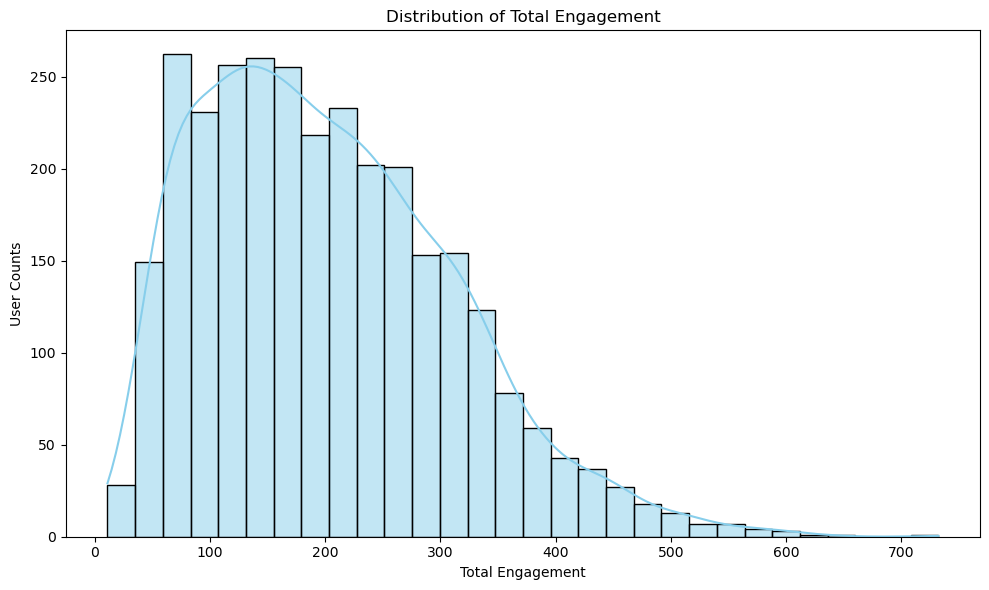

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
sns.histplot(df["TotalEngagement"],bins=30, kde=True, color="skyblue")
plt.title("Distribution of Total Engagement")
plt.xlabel("Total Engagement")
plt.ylabel("User Counts")
plt.tight_layout()
plt.show()

Total engagement shows a right skewed distribution
Small amount of users show high engagement 
Most users have low or medium engagement

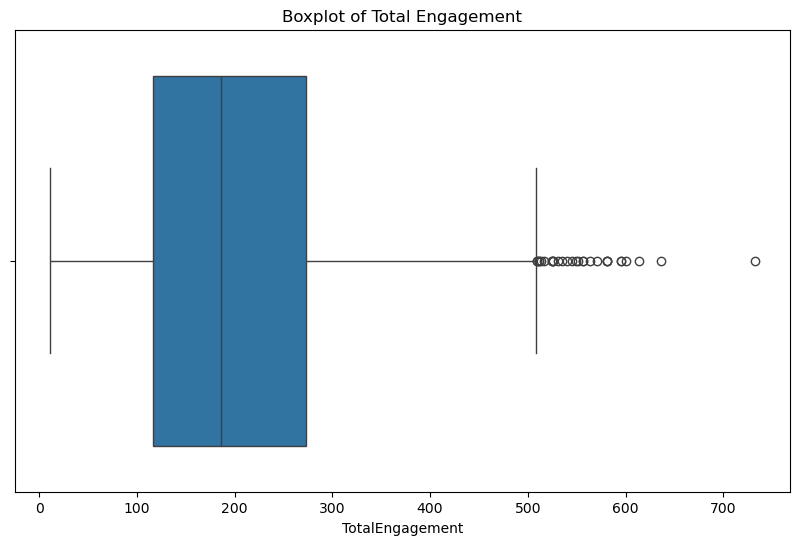

In [18]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df["TotalEngagement"])
plt.title("Boxplot of Total Engagement")
plt.show()

In [19]:
df["HighSpender"].value_counts()

HighSpender
0    2956
1      68
Name: count, dtype: int64

In [20]:
df["HadPurchased"].value_counts()

HadPurchased
1    2888
0     136
Name: count, dtype: int64

In [21]:
df["EarlyPurchase"].value_counts()

EarlyPurchase
0    2320
1     704
Name: count, dtype: int64

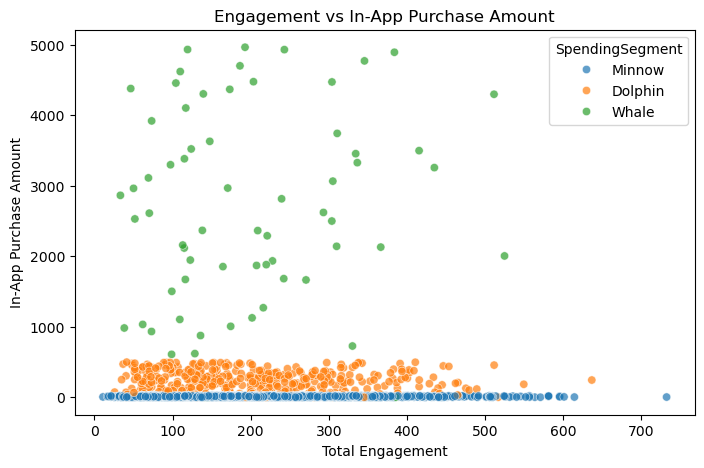

In [22]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    data=df,
    x="TotalEngagement",
    y="InAppPurchaseAmount",
    hue="SpendingSegment",
    alpha=0.7
)
plt.title("Engagement vs In-App Purchase Amount")
plt.xlabel("Total Engagement")
plt.ylabel("In-App Purchase Amount")
plt.show()


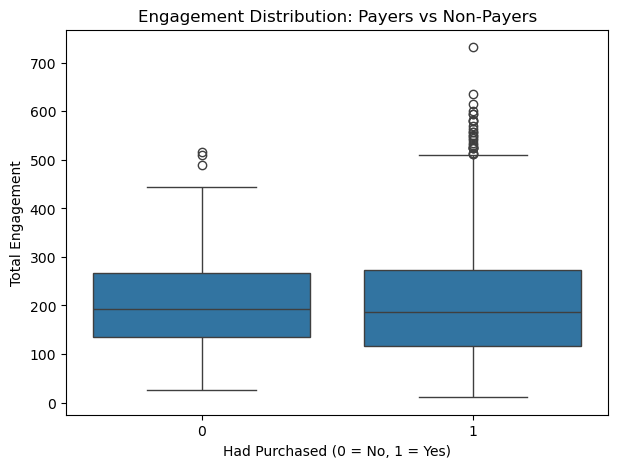

In [23]:
plt.figure(figsize=(7,5))
sns.boxplot(
    data=df,
    x="HadPurchased",
    y="TotalEngagement"
)
plt.title("Engagement Distribution: Payers vs Non-Payers")
plt.xlabel("Had Purchased (0 = No, 1 = Yes)")
plt.ylabel("Total Engagement")
plt.show()

In [24]:
Do highspenders convert faster?

Object `faster` not found.


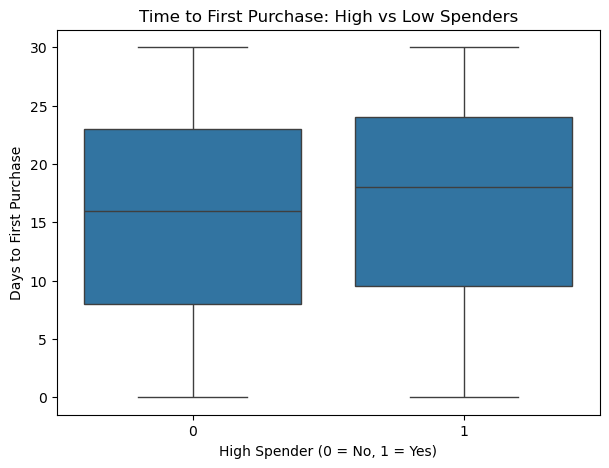

In [25]:
plt.figure(figsize=(7,5))
sns.boxplot(
    data=df[df["HadPurchased"] == 1],
    x="HighSpender",
    y="FirstPurchaseDaysAfterInstall"
)
plt.title("Time to First Purchase: High vs Low Spenders")
plt.xlabel("High Spender (0 = No, 1 = Yes)")
plt.ylabel("Days to First Purchase")
plt.show()

****************************** Machine Learning********************************

In [26]:
y = df["HadPurchased"]

features = [
    "Age",
    "Gender",
    "Device",
    "SessionCount",
    "AverageSessionLength",
    "TotalEngagement",
    "EarlyPurchase"
]

X = df[features]

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [29]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(
    max_iter=1000,
    class_weight="balanced"   # important if classes are imbalanced
)

model.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [30]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix
)

y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:, 1]

print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1-score :", f1_score(y_test, y_pred))
print("ROC-AUC  :", roc_auc_score(y_test, y_proba))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy : 0.4066115702479339
Precision: 0.974025974025974
Recall   : 0.3892733564013841
F1-score : 0.5562422744128553
ROC-AUC  : 0.6174548250672818

Confusion Matrix:
[[ 21   6]
 [353 225]]


Precision :97 when the model predicted purchase it is right 97% of the time

Recall: 38 The model only catches 39% of actual purchasers

In [31]:
import pandas as pd

coef_df = pd.DataFrame({
    "Feature": features,
    "Coefficient": model.coef_[0]
}).sort_values(by="Coefficient", ascending=False)

coef_df

,Feature,Coefficient
6,EarlyPurchase,2.497700
5,TotalEngagement,0.510127
1,Gender,0.189766
0,Age,-0.089529
2,Device,-0.132441
3,SessionCount,-0.338769
4,AverageSessionLength,-0.443278
